IMPORTING ALL MODULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time

converted the csv file into a dataframe and splited the data into testing and training (appx 20% ,80%), converted testing , training labels and features into numpy arrays .

In [2]:
df = pd.read_csv('Classified-BioFluidsLab-IITK-JDexperiment.csv')
df=df.dropna()
dftrain=df.iloc[:72000,:]
dftest=df.iloc[72000:,:]

dfXtrainfinal is the training features , dfYtrainfinal is the training labels , dfXtestfinal is the testing labels, dfYtestfinal are the expected outputs

In [3]:
scaler=StandardScaler()
dfXtrain=dftrain.iloc[:,:4]
dfXtest=dftest.iloc[:,:4]
dfYtrain=dftrain.iloc[:,4]
dfYtest=dftest.iloc[:,4]
dfXtrainfinal=scaler.fit_transform(dfXtrain)
# dfYtrain=scaler.fit_transform(dfY)
dfXtestfinal=scaler.fit_transform(dfXtest)
dfYtestfinal=dfYtest.to_numpy(dfYtest)
dfYtrainfinal=dfYtrain.to_numpy(dfYtrain)
dfYtrainfinal.shape

(72000,)

Wrote LocalLinearRegression code in OOPS fashion was initially getting some errors and hence printed shapes of various arrays/matrices to debug
first found weights of all records for a given datapoint where we need to predict (say xo) and wrote the closed form solution
over here X is the dataset , xo is the point where u want to predict , Y are the labels for training data.

In [4]:
class localinearreg():
  def __init__(self, tau):
     self.tau = tau
  def weightfind(self,xo,X):
    return np.exp(np.sum((X-xo)**2,axis=1) /(-2*(self.tau**2)))
  def predict(self, xo, X, Y):
    xo=np.r_[1,xo]
    X = np.c_[np.ones(len(X)), X]
    weights= self.weightfind(xo,X)
    xw = X.T*weights
    # print("X shape:", X.shape)
    # print("xw shape:", xw.shape)
    # print("y shape:", Y.shape)
    # W = np.diag(weights.flatten())
    # print("hello")
    theta = np.linalg.pinv(xw@X)@xw@Y
    return xo@theta

created an object of our class named model and set hyperparameter(tau to 0.105) (had experimented with various values between 0.01 to 0.2) got best results around 0.105

In [5]:
model = localinearreg(tau=0.105)

The prediction array is the array containing all the predictions

In [6]:
startt=time.time()
predictions = [model.predict(xo, dfXtrainfinal, dfYtrainfinal) for xo in dfXtestfinal]
endt=time.time()

In [14]:
-startt+endt

163.67284607887268

In [15]:
mae=mean_absolute_error(dfYtestfinal,predictions)

In [16]:
mae

39.01836529600668

In [17]:
r2=r2_score(dfYtestfinal,predictions)
r2

0.2535555434507948

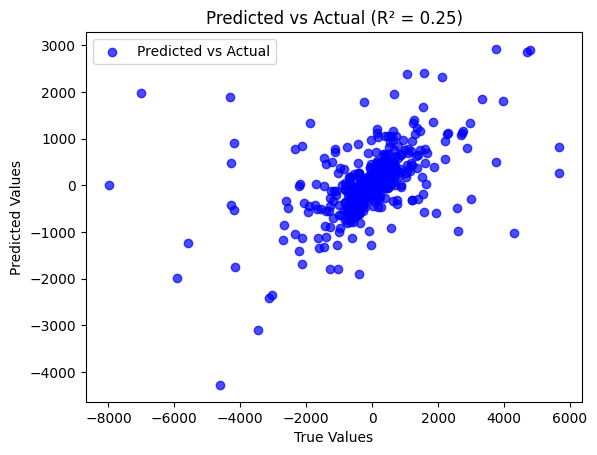

In [18]:
import matplotlib.pyplot as plt
plt.scatter(dfYtestfinal, predictions, label='Predicted vs Actual', color='blue', alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Predicted vs Actual (R² = {r2_score(dfYtestfinal, predictions):.2f})')
plt.legend()
plt.show()

Comparing the results with normal linear regression but with data after EDA

In [20]:
nw = pd.read_csv('function_E.csv')
nw=nw.dropna()
print(len(nw))
train_size = int(0.8 * len(nw))
nwtrain = nw.iloc[:train_size, :]
nwtest = nw.iloc[train_size:, :]

81598


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

nwXtrain = nwtrain.iloc[:, [0]]
nwXtest = nwtest.iloc[:, [0]]

nwYtrain = nwtrain.iloc[:, [1]]
nwYtest = nwtest.iloc[:, [1]]

nwXtrainfinal = scaler.fit_transform(nwXtrain)
nwXtestfinal = scaler.transform(nwXtest)

nwYtrainfinal = nwYtrain.to_numpy()
nwYtestfinal = nwYtest.to_numpy()

print(nwYtrainfinal)
print(nwYtestfinal)
print(nwXtestfinal)
print(nwXtrainfinal)

[[-3.22113286]
 [ 0.65285753]
 [-0.81929433]
 ...
 [-8.50539543]
 [-1.0156692 ]
 [-1.72738215]]
[[ 0.49074664]
 [ 0.72822136]
 [-2.42542818]
 ...
 [ 0.52056249]
 [-1.97878416]
 [ 0.89060972]]
[[-0.02071027]
 [-0.01854199]
 [-0.02788966]
 ...
 [-0.0196606 ]
 [-0.06238534]
 [-0.01917128]]
[[-0.03099177]
 [-0.02025779]
 [-0.02371928]
 ...
 [-0.06582769]
 [-0.02303854]
 [-0.02535063]]


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()
model.fit(nwXtrainfinal, nwYtrainfinal)

LinearRegression()

In [24]:
yPred = model.predict(nwXtestfinal)

In [25]:
mae = mean_absolute_error(nwYtestfinal, yPred)
r2 = r2_score(nwYtestfinal, yPred)

In [26]:
mae

23.668634125808964

In [27]:
r2

0.7940048008677713

In [ ]:
plt.scatter(nwYtestfinal, yPred, label='Predicted vs Actual', color='blue', alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Predicted vs Actual (R² = {r2_score(nwYtestfinal, yPred):.3f})')
plt.legend()
plt.show()

The value of MAE and R2 score for linear regression is 60.05,-0.001 while for local linear regression is 39.01,0.2535 and hence local linear regression performed much better than linear regression for this dataset
(without EDA)

While after EDA analysis R2 score for linear regression increased to 0.79 and mae reduced to 23.66